**Name:** \_\_\_\_\_Huanchen Wang

**EID:** \_\_\_\_\_ 57558749

# CS5489 - Tutorial 2
## Text Document Classification with Naive Bayes

In this tutorial you will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

First we need to initialize Python.  Run the below cell.

In [1]:
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats, special
random.seed(100)

Next, put the file "20news-bydate_py3.pkz' into the same directory as this ipynb file. **Do not unzip the file.**

Next, we will extract 4 classes from the dataset.  Run the below cell.

In [2]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                           remove=removeset, categories=cats, data_home='./')
newsgroups_test = datasets.fetch_20newsgroups(subset='test', 
                           remove=removeset, categories=cats, data_home='./')

Now, we check if we got all the data.  The training set should have 2034 documents, and the test set should have 1353 documents.

In [3]:
print("training set size:", len(newsgroups_train.data))
print("testing set size: ",  len(newsgroups_test.data))
print(newsgroups_train.target_names)

training set size: 2034
testing set size:  1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


Count the number examples in each class.  `newsgroups_train.target` is an array of class values (0 through 3), and `newsgroups_train.target[i]` is the class of the i-th document.

In [4]:
print("class counts")
for i in [0, 1, 2, 3]:
    print("{:20s}: {}".format(newsgroups_train.target_names[i], sum(newsgroups_train.target == i)))

class counts
alt.atheism         : 480
comp.graphics       : 584
sci.space           : 593
talk.religion.misc  : 377


Now have a look at the documents.  `newsgroups_train.data` is a list of strings, and `newsgroups_train.data[i]` is the i-th document.

In [5]:
for i in [0, 1, 2 ,3]:
    print("--- document {} (class={}) ---".format(
        i, newsgroups_train.target_names[newsgroups_train.target[i]]))
    print(newsgroups_train.data[i])

--- document 0 (class=comp.graphics) ---
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--- document 1 (class=talk.religion.misc) ---


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

**Tip:** while you do the tutorial, it is okay to make additional code cells in the file.  This will allow you to avoid re-running code (like training a classifier, then testing a classifier).

### Build document vectors
Create the vocabulary from the training data.  Then build the document vectors for the training and testing sets.  You can decide how many words you want in the vocabulary.

In [6]:
# pull out the document data and labels
traindata = newsgroups_train.data
trainY = newsgroups_train.target

testdata = newsgroups_test.data
testY  = newsgroups_test.target

In [ ]:
### INSERT YOUR CODE HERE

In [7]:
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=300)

trainX = cntvect.fit_transform(traindata)
testX  = cntvect.transform(testdata)
print(cntvect.vocabulary_)

{'ve': 283, 'file': 89, 'given': 99, 'does': 74, 'know': 132, 'information': 123, 'said': 222, 'like': 141, 'able': 12, 'read': 211, 'format': 94, 'available': 26, 'evidence': 82, 'simply': 238, 'thought': 266, 'children': 45, '1993': 7, 'article': 21, 'com': 53, 'actually': 13, 'used': 278, 'just': 131, 'say': 225, 'mail': 155, 'quite': 209, 'mr': 173, 'post': 195, 'questions': 208, 'away': 27, 'doing': 76, 'level': 138, 'best': 32, 'change': 44, 'subject': 253, 'following': 92, 'address': 14, 'include': 120, 'similar': 237, 'answer': 17, 'really': 213, 'looking': 149, 'want': 287, 'think': 265, 'ask': 22, 'christian': 47, 'question': 207, 'lunar': 153, 'atheists': 25, 'sure': 256, 'list': 143, 'atheist': 24, 'bit': 36, 'history': 114, 'example': 83, 'probably': 199, 'note': 180, 'old': 183, 'data': 62, 'source': 244, 'non': 179, 'earth': 78, 'space': 246, 'technology': 259, '20': 8, 'software': 242, 'standard': 248, '16': 6, 'computer': 56, 'support': 255, 'real': 212, 'time': 267, '

###  Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set.  What is the prediction accuracy on the test set?  Try different parameters (alpha, max_features, etc) to get the best performance.

In [ ]:
### INSERT YOUR CODE HERE

In [9]:
mf_l = [1000, 2500, 5000, 7500, 10000]
alp_l = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
best_acc = 0
print('max_features, alpha, accuracy')
for mf in mf_l:
    for alp in alp_l:
        cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=mf)
        trainX = cntvect.fit_transform(traindata)
        testX = cntvect.transform(testdata)    
        
        bmodel = naive_bayes.BernoulliNB(alpha=alp)
        bmodel.fit(trainX, trainY)
        predY = bmodel.predict(testX)
        acc = metrics.accuracy_score(testY, predY)
        print(mf, alp, acc)
        best_acc = max(acc, best_acc)

max_features, alpha, accuracy
1000 0.05 0.6674057649667405
1000 0.1 0.663710273466371
1000 0.15 0.6585365853658537
1000 0.2 0.6600147819660015
1000 0.25 0.6585365853658537
1000 0.3 0.656319290465632
2500 0.05 0.6821877309682187
2500 0.1 0.6747967479674797
2500 0.15 0.6747967479674797
2500 0.2 0.6711012564671102
2500 0.25 0.6696230598669624
2500 0.3 0.6629711751662971
5000 0.05 0.688839615668884
5000 0.1 0.6844050258684405
5000 0.15 0.6807095343680709
5000 0.2 0.6770140428677014
5000 0.25 0.6755358462675536
5000 0.3 0.6733185513673319
7500 0.05 0.6954915003695491
7500 0.1 0.6895787139689579
7500 0.15 0.6836659275683666
7500 0.2 0.6784922394678492
7500 0.25 0.6733185513673319
7500 0.3 0.6688839615668883
10000 0.05 0.6977087952697709
10000 0.1 0.6910569105691057
10000 0.15 0.6821877309682187
10000 0.2 0.6807095343680709
10000 0.25 0.6740576496674058
10000 0.3 0.6688839615668883


In [10]:
# Best parameter pairs

cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=10000)
trainX = cntvect.fit_transform(traindata)
testX = cntvect.transform(testdata)

bmodel = naive_bayes.BernoulliNB(alpha=0.05)
bmodel.fit(trainX, trainY)

BernoulliNB(alpha=0.05)

What are the most important (frequent) words for each category?  Run the below code.

Note: `model.feature_log_prob_[i]` will index the word log-probabilities for the i-th class

In [11]:
# get the word names
fnames = asarray(cntvect.get_feature_names_out())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bmodel.feature_log_prob_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], bmodel.feature_log_prob_[i][t]))

class alt.atheism
    time      (-1.80391)
    know      (-1.60913)
    does      (-1.60913)
    god       (-1.58852)
    like      (-1.54853)
    say       (-1.52912)
    just      (-1.45505)
    think     (-1.39445)
    people    (-1.29842)
    don       (-1.19005)
class comp.graphics
    just      (-1.95063)
    don       (-1.91514)
    program   (-1.88087)
    need      (-1.85866)
    does      (-1.74461)
    use       (-1.73486)
    like      (-1.60747)
    know      (-1.50987)
    graphics  (-1.49449)
    thanks    (-1.47186)
class sci.space
    earth     (-1.90746)
    use       (-1.88500)
    time      (-1.76975)
    think     (-1.73093)
    nasa      (-1.73093)
    know      (-1.73093)
    don       (-1.69356)
    just      (-1.47234)
    like      (-1.41520)
    space     (-1.01915)
class talk.religion.misc
    say       (-1.65515)
    way       (-1.62777)
    like      (-1.61436)
    does      (-1.53744)
    know      (-1.48927)
    think     (-1.42110)
    god       (-1.378

### Multinomial Naive Bayes model
Now learn a multinomial Naive Bayes model using the TF-IDF representation for the documents.  Again try different parameter values to improve the test accuracy.

In [ ]:
### INSERT YOUR CODE HERE

In [12]:
mf_l = [1000, 2500, 5000, 7500, 10000]
alp_l = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
best_acc = 0
print('max_features, alpha, accuracy')
for mf in mf_l:
    for alp in alp_l:
        tf_trans = feature_extraction.text.TfidfVectorizer(stop_words='english', max_features=mf)

        trainXtf = tf_trans.fit_transform(traindata)

        testXtf = tf_trans.transform(testdata)
        mmodel_tf = naive_bayes.MultinomialNB(alpha=alp)
        mmodel_tf.fit(trainXtf, trainY)
        predY = mmodel_tf.predict(testXtf)
        acc = metrics.accuracy_score(testY, predY)
        print(mf, alp, acc)
        best_acc = max(acc, best_acc)

max_features, alpha, accuracy
1000 0.05 0.7354028085735402
1000 0.1 0.7339246119733924
1000 0.15 0.7368810051736882
1000 0.2 0.7331855136733185
1000 0.25 0.7324464153732446
1000 0.3 0.7317073170731707
2500 0.05 0.7568366592756837
2500 0.1 0.7583148558758315
2500 0.15 0.7575757575757576
2500 0.2 0.7575757575757576
2500 0.25 0.7568366592756837
2500 0.3 0.753880266075388
5000 0.05 0.7841832963784183
5000 0.1 0.779009608277901
5000 0.15 0.7775314116777532
5000 0.2 0.7745750184774575
5000 0.25 0.7716186252771619
5000 0.3 0.7716186252771619
7500 0.05 0.7834441980783444
7500 0.1 0.7827050997782705
7500 0.15 0.7812269031781227
7500 0.2 0.7797487065779749
7500 0.25 0.7797487065779749
7500 0.3 0.779009608277901
10000 0.05 0.7945306725794531
10000 0.1 0.7900960827790096
10000 0.15 0.7893569844789357
10000 0.2 0.78640059127864
10000 0.25 0.78640059127864
10000 0.3 0.7834441980783444


In [13]:
# Best parameter pairs

tf_trans = feature_extraction.text.TfidfVectorizer(stop_words='english', max_features=10000)
trainXtf = tf_trans.fit_transform(traindata)
testXtf = tf_trans.transform(testdata)

mmodel_tf = naive_bayes.MultinomialNB(alpha=0.05)
mmodel_tf.fit(trainXtf, trainY)

MultinomialNB(alpha=0.05)

What are the most important features for Multinomial model? Run the below code.

In [14]:
# get the word names
fnames = asarray(cntvect.get_feature_names_out())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mmodel_tf.feature_log_prob_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], mmodel_tf.feature_log_prob_[i][t]))

class alt.atheism
    islam     (-6.06160)
    does      (-5.95560)
    atheism   (-5.85342)
    religion  (-5.84447)
    say       (-5.79228)
    just      (-5.72313)
    think     (-5.59839)
    don       (-5.49316)
    people    (-5.46925)
    god       (-5.23944)
class comp.graphics
    hi        (-5.84581)
    does      (-5.81074)
    looking   (-5.79383)
    program   (-5.75051)
    know      (-5.68309)
    file      (-5.60532)
    files     (-5.57679)
    image     (-5.57099)
    thanks    (-5.32761)
    graphics  (-5.13133)
class sci.space
    earth     (-6.21034)
    shuttle   (-6.19199)
    think     (-6.17245)
    orbit     (-6.03531)
    moon      (-6.02187)
    launch    (-6.01098)
    just      (-5.99076)
    like      (-5.86949)
    nasa      (-5.68725)
    space     (-4.90700)
class talk.religion.misc
    objective (-6.06972)
    think     (-6.01246)
    bible     (-5.99750)
    just      (-5.98479)
    christians (-5.96254)
    don       (-5.94752)
    christian (-5.75

How do the most important words differ between the TF-IDF multinomial model and the Bernoulli model?

- **INSERT YOUR ANSWER HERE**
+ Above all, the Bernoulli model just takes into accounts the word's apperance frequency in the whole crops, but the TF-IDF multinomial model only cares about the word's apperance frequency in a specific class.

+ Therefore, some words like 'like', 'think' appear in all the 4 classes are treated as the more informative in a Bernoulli model, but theirs informative ranks are relatively lower in a TF-IDF Multinomial model:

    + To the Bernoulli model, there are many same important features in the different class, such as the **like**, which is a important feature in all 4 classes.

    + To the TF-IDF multinomial model, there are more identified words(features) in their own classes, such as the atheism in class 0, program in class 1, moon in class 2, and christian in class 3.

Finally, look at a few of the misclassified documents. 

In [ ]:
### INSERT YOUR CODE HERE ###

In [15]:
predY = mmodel_tf.predict(testXtf)
inds = where(predY != testY)
for i in inds[0][:10]:
    print("---- true={}, pred={}".format(testY[i], predY[i]))
    print(testdata[i])

---- true=0, pred=2
 

---- true=3, pred=2
[ deleted ]
[ deleted ]

  Your information on this topic is very much out of date.  Quantum Electro-
dynamics (QED - which considers light to be particles) has been experimentally
verified to about 14 decimal digits of precision under ALL tested conditions.
I'm afraid that this case, at least in the physics community, has been decided.
Laymen should consult "QED - The Strange Theory of Light and Matter" by Richard
P. Feynman and for the more technically minded there's "The Feynman Lectures on
Physics" by Feynman, Leighton and Sands (an excellent 3 volumes).  Case closed.

---- true=0, pred=2

Then Einstein should have had lunch with me at the Tien Fu
on Castro Street yesterday, when they handed me a fortune
cookie that said "He who has imagination but not knowledge
has wings, but no feet".
---- true=3, pred=0
This discussion on "objective" seems to be falling into solipsism (Eg: the
recent challenge from Frank Dwyer, for someone to prove that

Can you get any intuition or reason why they were misclassified?

- **INSERT YOUR ANSWER HERE**

+ According to the content of some of these news, some of the newsgroups are related to each other, which might increase the uncertainty.

+ There are some words are related to the mis-pred classes, like the Einstein is most closed to the sci classes, who is a physicist. Thus, these words are more important in the mis-pred classes, and lead to the misclassified.

+  the attitudes are not paid attention in the vocabulary, such as the class 'talk.religion. misc' and 'alt.atheism', which are talk about the similar topic but have the different attitudes.  As a result, same words are used even though the two classes are conveying two contrary views.


### Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance.  Using the Multinomial TF-IDF models, make a plot of accuracy versus different values of alpha. For each alpha, you need to train a new model. Which alpha value yields the best result?

In [ ]:
### INSERT YOUR CODE HERE

In [16]:
tf_trans = feature_extraction.text.TfidfVectorizer(stop_words='english', max_features=10000)

trainXtf = tf_trans.fit_transform(traindata)

testXtf = tf_trans.transform(testdata)

alp_l = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
acc_l = []
for alp in alp_l:
    mmodel_tf = naive_bayes.MultinomialNB(alpha=alp)
    mmodel_tf.fit(trainXtf, trainY)
    predY = mmodel_tf.predict(testXtf)
    acc = metrics.accuracy_score(testY, predY)
    acc_l.append(acc)

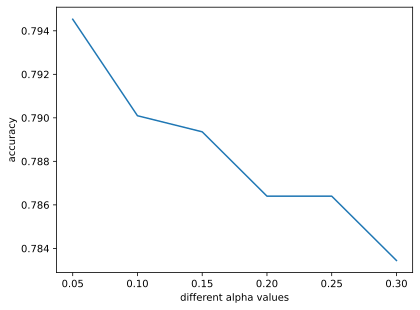

In [17]:
plt.xlabel('different alpha values')
plt.ylabel('accuracy')
plt.plot(alp_l, acc_l)

### 5. Effect of vocabulary size
The vocabulary size also affects the accuracy.  Make another plot of accuracy versus vocabulary size.  Which vocabulary size yields the best result?

In [ ]:
### INSERT YOUR CODE HERE

In [18]:
mf_l = [1000, 2500, 5000, 7500, 10000]
acc_l = []
for mf in mf_l:
    tf_trans = feature_extraction.text.TfidfVectorizer(stop_words='english', max_features=mf)
    trainXtf = tf_trans.fit_transform(traindata)
    testXtf = tf_trans.transform(testdata)
    
    mmodel_tf = naive_bayes.MultinomialNB(alpha=0.05)
    mmodel_tf.fit(trainXtf, trainY)
    predY = mmodel_tf.predict(testXtf)
    acc = metrics.accuracy_score(testY, predY)
    acc_l.append(acc)

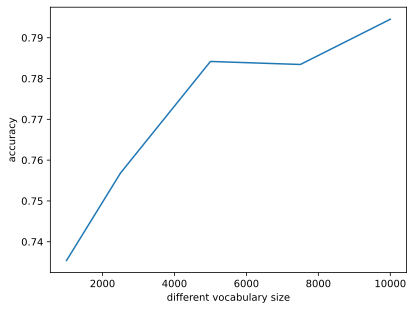

In [19]:
plt.xlabel('different vocabulary size')
plt.ylabel('accuracy')
plt.plot(mf_l, acc_l)

## Poisson Naive Bayes

Now we will implement a Naive Bayes classifier using a Poisson distribution to model the count of each word appearing in the document.  Recall that the Poisson distribution is:
$$ \mathrm{Poisson}(x,\mu) = \frac{1}{x!}e^{-\mu} \mu^x$$
where $x \in \{0,1,2,\cdots\}$ is a counting number, and $\mu$ is the Poisson mean (arrival rate).

Here is some code showing how to compute the Poisson distribution using scipy.

[[ -1.          -2.          -3.5       ]
 [ -1.          -1.30685282  -2.24723703]
 [ -1.69314718  -1.30685282  -1.68762124]
 [ -2.79175947  -1.71231793  -1.53347056]
 [ -4.17805383  -2.40546511  -1.66700196]
 [ -5.78749174  -3.32175584  -2.0236769 ]
 [ -7.57925121  -4.42036813  -2.5626734 ]
 [ -9.52516136  -5.6731311   -3.25582058]
 [-11.6046029   -7.05942546  -4.08249915]
 [-13.80182748  -8.56350286  -5.02696076]
 [-16.10441257 -10.17294077  -6.07678289]
 [-18.50230785 -11.87768886  -7.22191519]
 [-20.9872145  -13.66944833  -8.45405887]
 [-23.55216385 -15.54125051  -9.76624526]
 [-26.19122118 -17.48716065 -11.15253962]
 [-28.89927138 -19.50206368 -12.60782686]
 [-31.67186011 -21.58150522 -14.12765261]
 [-34.50507345 -23.72157138 -15.70810299]
 [-37.39544521 -25.91879596 -17.34571178]
 [-40.33988419 -28.17008776 -19.03738779]]


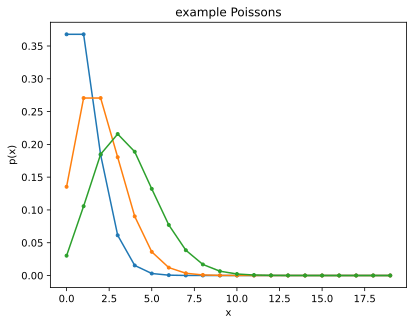

In [24]:
# Poisson distribution
from scipy.stats import poisson

# compute log Poisson(x, lambda)
px = poisson.logpmf(arange(0,20).reshape((20,1)), mu=[[1., 2., 3.5]])

# NOTE: the function respects broadcasting
# x is a column vector, and mu is a row vector
# in the output px, each column is the log Poisson values for one mu
print(px)

# make a plot
plt.title('example Poissons')
plt.plot(arange(0,20), exp(px), '.-');
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

Now let's see how to use the Poisson to create a Naive Bayes model. Let $x_i$ be the number of times the i-th word appears in the document. Then we model $x_i$ as a Poisson distribution for each class $c$,
  $$p(x_i|y=c) = \mathrm{Poisson}(x_i, \mu_{i,c})$$
where $\mu_{i, c}$ is the Poisson parameter for the i-th word in the c-th class.  Given the data $\{x_i^{(1)}, \cdots x_i^{(N)}\}$, corresponding the counts of the i-th word in the documents in the c-th class, $\mu_{i,c}$ is estimated as the mean of the data: $\mu_{i,c} = \frac{1}{N} \sum_{n=1}^N x_i^{(n)}$.

Finally, given the document $\mathbf{x} = [x_1,\cdots,x_D]$, the document class-conditional likelihood is:
  $$ p(\mathbf{x}|y=c) = \prod_{i=1}^D p(x_i|y=c) = \prod_{i=1}^D \mathrm{Poisson}(x_i, \mu_{i,c})$$
or CCD log-likelihood is
  $$ \log p(\mathbf{x}|y=c) = \sum_{i=1}^D \log \mathrm{Poisson}(x_i, \mu_{i,c})$$

Write a class for the Poisson Naive Bayes model.  Starting with the `GaussBayes` class from lecture as the template, you only need to change the estimation of the parameters $\mu_{i,c}$ and the computation of the log CCD.

In [ ]:
### INSERT YOUR CODE HERE

In [81]:
a = array([[1, 2, 3], [2, 3, 4]])
b = array([[9,9,9]])
row_stack((a,b))

array([[1, 2, 3],
       [2, 3, 4],
       [9, 9, 9]])

In [83]:
from scipy.special import logsumexp

class PoissonBayes:
    # constructor: 
    #  alpha is used by the Laplace smoothing method
    def __init__(self, alpha=0.0):
        self.alpha = alpha
    
    # Fit the model: assumes classes are [0,1,2,...K-1]
    # K is the max value in y
    def fit(self, X, y):
        # get the number of classes
        K = max(y)+1
        self.K = K
        
        # estimate mean and covariance
        self.mu = []
        self.Sigma = []
        for c in range(K):
            Xc = X[y==c]   # select samples for this class
            # estimate the mean and covariance
            alpha_row = self.alpha * ones((1, X.shape[1]))
            X_alpha = row_stack((alpha_row, Xc))
            self.mu.append(sum(X_alpha, axis=0)/(len(X_alpha)+self.alpha))
                        
        # estimate class priors
        tmp = []
        for c in range(K):
            tmp.append( count_nonzero(y==c) ) # number of Class c
        self.pi = array(tmp) / len(y)  # divide by the total
    
    # compute the log CCD for class c, log p(x|y=c)
    def compute_logccd(self, X, c):
        lx = poisson.logpmf(X, self.mu[c])
        lx = sum(lx, axis=1)
        return lx
    
    # compute the joint log-likelihood: log p(x,y)
    def compute_logjoint(self, X):
        # compute log joint likelihood: log p(x|y) + log p(y)
        jl = []
        for c in range(self.K):
            jl.append( self.compute_logccd(X, c) + log(self.pi[c]) )
        
        # p[i,c] = log p(X[i]|y=c)
        p = stack( jl, axis=-1 )
        return p
        
#     # compute the posterior log-probability of each class given X
#     def predict_logproba(self, X):        
#         lp = self.compute_logjoint(X)  # compute joint loglikelihoods
#         lpx = logsumexp(lp, axis=1)    # compute log p(x) = log sum_c exp( log p(x,y))
#         return lp - lpx[:,newaxis]     # compute log posterior: log p(y|x) = log p(x,y) - lo
    
#     # compute the posterior probability of each class given X
#     def predict_proba(self, X):
#         return exp( self.predict_logproba(X) )
    
    # compute the most likely class given X
    def predict(self, X):
        lp = self.compute_logjoint(X)   # compute joint likelihoods
        c = argmax(lp, axis=1)          # find the maximum
        return c                        # return the class label

Now test your Poisson NB model on the Newsgroup dataset.

In [ ]:
### INSERT YOUR CODE HERE

In [84]:
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=900)
trainX = cntvect.fit_transform(traindata)
testX = cntvect.transform(testdata)

In [87]:
pmodel = PoissonBayes(0.05)
pmodel.fit(trainX.toarray(), trainY)  # map from 1...2 to 0...1
pmodel.mu

[array([1.03939299e-04, 3.54433011e-02, 1.04978692e-02, 6.34029727e-03,
        1.67342272e-02, 3.12857291e-02, 1.03939299e-04, 1.46554412e-02,
        6.34029727e-03, 1.25766552e-02, 1.46554412e-02, 1.25766552e-02,
        1.46554412e-02, 8.41908326e-03, 6.34029727e-03, 2.08917992e-02,
        2.08917992e-02, 6.34029727e-03, 1.88130132e-02, 1.04978692e-02,
        8.41908326e-03, 1.04978692e-02, 6.34029727e-03, 2.18272529e-03,
        1.46554412e-02, 4.26151128e-03, 1.03939299e-04, 2.18272529e-03,
        2.18272529e-03, 6.34029727e-03, 1.04978692e-02, 1.03939299e-04,
        1.04978692e-02, 5.83099470e-02, 8.41908326e-03, 7.90978069e-02,
        1.04978692e-02, 6.24675190e-02, 5.20735890e-02, 4.99948030e-02,
        4.16796591e-02, 2.18272529e-03, 1.67342272e-02, 1.14437169e-01,
        5.20735890e-02, 2.50493712e-02, 2.29705852e-02, 6.34029727e-03,
        1.03939299e-04, 3.96008731e-02, 1.12358383e-01, 6.34029727e-03,
        1.03939299e-04, 4.99948030e-02, 3.75220871e-02, 1.289886

In [88]:
predY = pmodel.predict(testX.toarray())
# calculate accuracy
acc = metrics.accuracy_score(testY, predY)
print("accuracy=", acc)

accuracy= 0.6851441241685144


How does the Poisson NB model compare with the other models that you tested?  Is this a good model for documents?

- **INSERT YOUR ANSWER HERE**

+ To the vocabulary with **small** size, like the max_features = 900, the Possion NB's performance is **better** than the Bernoulli NB and Multinomial NB, but with **large** size, like max_features = 10000, the Possion NB's performance is **worse** than else others.
+ According to this findings and the ccd calculate method of the possion is discrete, which is memoryless, can just focus on the words rather than the whole documents. Thus, I think Possion NB is not a good model for documents.